In [1]:
# This data is chained to 2012 dollars
# All of these prices are in thousands of dollars

In [2]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = 'Data Sets/Austin Growth 2001-2018.csv'

data = (pd.read_csv(path))

In [4]:
# Make a list of all the industries in the dataframe
industries = []
industries.append(data["Description"].unique())

In [5]:
# Drop columns to make DataFrame easyer to read
austin_df = data.drop(columns=["GeoFips","GeoName","LineCode","2001","2002","2003","2004","2005","2006","2007","2008","2009"])

In [6]:
# Drop rows because many of them have errors and they make the data incorrect
austin = austin_df.drop(austin_df.index[[0,1,6,13,18,19,20,23,28]])
n = austin_df.columns.drop("Description")
austin

,Description,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,"Agriculture, forestry, fishing and hunting",48455,30780,60176,78511,38964,56228,85658,54296,73134
3,"Mining, quarrying, and oil and gas extraction",811231,1099173,1090154,1018098,1178922,1454393,1303397,1230714,1230727
4,Utilities,725645,756885,792281,637305,664827,740633,727157,631238,(D)
5,Construction,4055938,4033457,4417061,4755765,5054755,5798491,6368921,6790285,7041336
7,Durable goods manufacturing,12140442,12837728,11567345,11799504,11691667,12983886,13997884,14984412,15804048
8,Nondurable goods manufacturing,1089885,1061545,1101350,1396643,1576150,1983783,1660638,1780343,1932575
9,Wholesale trade,10159799,11010524,11846633,11782009,11676600,12891564,13211915,14033724,14005844
10,Retail trade,5630584,5652841,5858068,6175205,6554214,6875430,7169928,7448544,7983229
11,Transportation and warehousing,1209301,1370883,1553874,1613560,1839547,1892658,1891173,2141492,2377359
12,Information,5917372,5989552,6099462,6722032,6953536,7787543,8306338,9266014,(D)


In [7]:
# replacing (D) with 0
austin[n] = austin[n].replace("(D)","0")

In [8]:
# Change the year type instead of being objects to float so you can make changes
austin[n] = austin[n].astype("float", errors="ignore")

# add a new column to a dataframe for the % change
austin["% Change from 2010-2018"] = ""
austin

,Description,2010,2011,2012,2013,2014,2015,2016,2017,2018,% Change from 2010-2018
2,"Agriculture, forestry, fishing and hunting",48455.0,30780.0,60176.0,78511.0,38964.0,56228.0,85658.0,54296.0,73134.0,
3,"Mining, quarrying, and oil and gas extraction",811231.0,1099173.0,1090154.0,1018098.0,1178922.0,1454393.0,1303397.0,1230714.0,1230727.0,
4,Utilities,725645.0,756885.0,792281.0,637305.0,664827.0,740633.0,727157.0,631238.0,0.0,
5,Construction,4055938.0,4033457.0,4417061.0,4755765.0,5054755.0,5798491.0,6368921.0,6790285.0,7041336.0,
7,Durable goods manufacturing,12140442.0,12837728.0,11567345.0,11799504.0,11691667.0,12983886.0,13997884.0,14984412.0,15804048.0,
8,Nondurable goods manufacturing,1089885.0,1061545.0,1101350.0,1396643.0,1576150.0,1983783.0,1660638.0,1780343.0,1932575.0,
9,Wholesale trade,10159799.0,11010524.0,11846633.0,11782009.0,11676600.0,12891564.0,13211915.0,14033724.0,14005844.0,
10,Retail trade,5630584.0,5652841.0,5858068.0,6175205.0,6554214.0,6875430.0,7169928.0,7448544.0,7983229.0,
11,Transportation and warehousing,1209301.0,1370883.0,1553874.0,1613560.0,1839547.0,1892658.0,1891173.0,2141492.0,2377359.0,
12,Information,5917372.0,5989552.0,6099462.0,6722032.0,6953536.0,7787543.0,8306338.0,9266014.0,0.0,


In [9]:
# get the % change of year 2010 and 2018 to see how much an industry has grown in 8 years
diff = (austin["2018"] - austin["2010"])/austin["2010"]
austin["% Change from 2010-2018"] = diff
austin

,Description,2010,2011,2012,2013,2014,2015,2016,2017,2018,% Change from 2010-2018
2,"Agriculture, forestry, fishing and hunting",48455.0,30780.0,60176.0,78511.0,38964.0,56228.0,85658.0,54296.0,73134.0,0.509318
3,"Mining, quarrying, and oil and gas extraction",811231.0,1099173.0,1090154.0,1018098.0,1178922.0,1454393.0,1303397.0,1230714.0,1230727.0,0.517110
4,Utilities,725645.0,756885.0,792281.0,637305.0,664827.0,740633.0,727157.0,631238.0,0.0,-1.000000
5,Construction,4055938.0,4033457.0,4417061.0,4755765.0,5054755.0,5798491.0,6368921.0,6790285.0,7041336.0,0.736056
7,Durable goods manufacturing,12140442.0,12837728.0,11567345.0,11799504.0,11691667.0,12983886.0,13997884.0,14984412.0,15804048.0,0.301769
8,Nondurable goods manufacturing,1089885.0,1061545.0,1101350.0,1396643.0,1576150.0,1983783.0,1660638.0,1780343.0,1932575.0,0.773192
9,Wholesale trade,10159799.0,11010524.0,11846633.0,11782009.0,11676600.0,12891564.0,13211915.0,14033724.0,14005844.0,0.378555
10,Retail trade,5630584.0,5652841.0,5858068.0,6175205.0,6554214.0,6875430.0,7169928.0,7448544.0,7983229.0,0.417833
11,Transportation and warehousing,1209301.0,1370883.0,1553874.0,1613560.0,1839547.0,1892658.0,1891173.0,2141492.0,2377359.0,0.965895
12,Information,5917372.0,5989552.0,6099462.0,6722032.0,6953536.0,7787543.0,8306338.0,9266014.0,0.0,-1.000000


In [10]:
# What industry grew the most from 2010 to 2018
grow = austin[["Description","% Change from 2010-2018"]]
grow = grow.dropna()

In [11]:
# Make a datafame to organize data
grow = grow.loc[grow['% Change from 2010-2018'] != -1.000000]
grow

,Description,% Change from 2010-2018
2,"Agriculture, forestry, fishing and hunting",0.509318
3,"Mining, quarrying, and oil and gas extraction",0.517110
5,Construction,0.736056
7,Durable goods manufacturing,0.301769
8,Nondurable goods manufacturing,0.773192
9,Wholesale trade,0.378555
10,Retail trade,0.417833
11,Transportation and warehousing,0.965895
14,Finance and insurance,0.352403
15,Real estate and rental and leasing,0.494063


Text(0, 0.5, 'Percentage change')

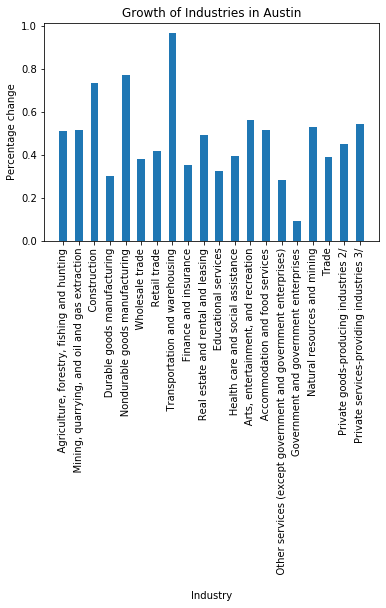

In [12]:
# How much did each industry grew in 8 years

plt.bar(grow["Description"], grow["% Change from 2010-2018"], width=.5)
plt.xticks(rotation=90)
plt.title("Growth of Industries in Austin")
plt.xlabel("Industry")
plt.ylabel("Percentage change")

In [13]:
# Select the categories that changhe the most in 8 years

Nondurable = list(austin.iloc[8,1:10])
Transportation = list(austin.iloc[11,1:10])
construction = list(austin.iloc[5,1:10])

In [14]:
# creat a list of years
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018]

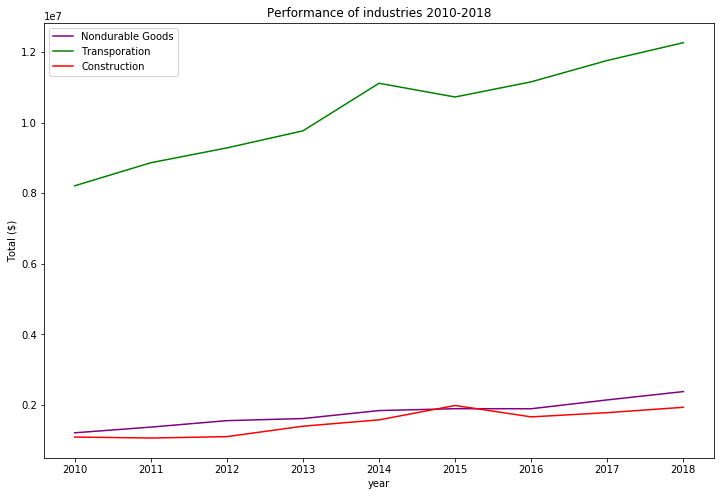

In [15]:
# Plot each category as its own line

plt.figure(figsize=(12,8))
plt.plot(year,Nondurable, label='Nondurable Goods', c='purple')
plt.plot(year, Transportation, label='Transporation', c='g')
plt.plot(year, construction, label='Construction', c='r')
plt.title('Performance of industries 2010-2018')
plt.xlabel('year')
plt.ylabel('Total ($)')
plt.legend()
plt.show()

In [16]:
# What are the best industries in 2018?
best = austin.nlargest(6,["2018"])
best

,Description,2010,2011,2012,2013,2014,2015,2016,2017,2018,% Change from 2010-2018
34,Private services-providing industries 3/,60896053.0,64205647.0,67884123.0,70807343.0,75570027.0,80477678.0,83789034.0,88156827.0,93876642.0,0.541588
33,Private goods-producing industries 2/,18133108.0,19073653.0,18236086.0,19049510.0,19558594.0,22315680.0,23573586.0,25063471.0,26304298.0,0.450623
30,Trade,15791227.0,16663207.0,17704701.0,17956616.0,18228527.0,19764588.0,20379439.0,21481096.0,21976612.0,0.391698
7,Durable goods manufacturing,12140442.0,12837728.0,11567345.0,11799504.0,11691667.0,12983886.0,13997884.0,14984412.0,15804048.0,0.301769
27,Government and government enterprises,13224761.0,13043491.0,13134066.0,13328014.0,13346800.0,13637645.0,14016491.0,14277932.0,14434132.0,0.091447
9,Wholesale trade,10159799.0,11010524.0,11846633.0,11782009.0,11676600.0,12891564.0,13211915.0,14033724.0,14005844.0,0.378555


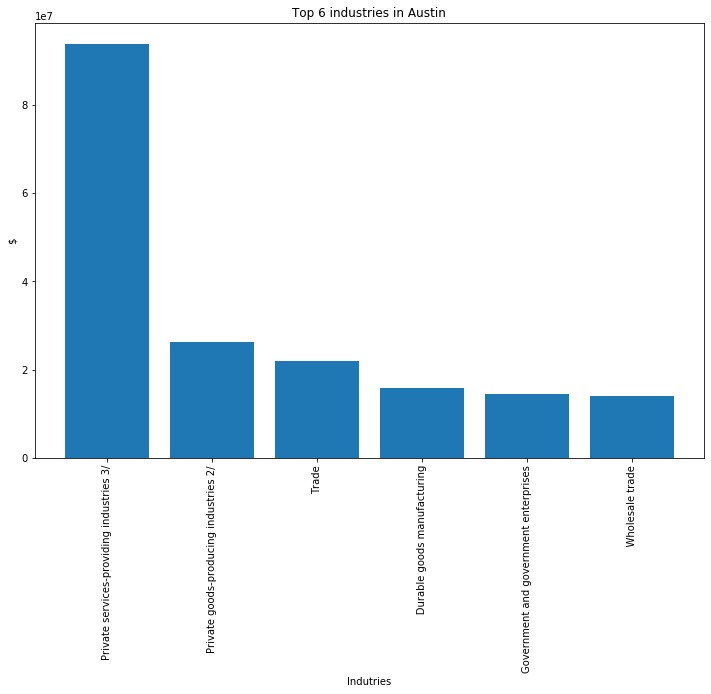

In [17]:
# Graph how are these industries doing over time
# Get the data from "best" and graph how they compare to each other 

best_2018 = best[["Description","2018"]]
best_2018

# Plot
plt.figure(figsize=(12,8))
plt.bar(best_2018["Description"], best_2018["2018"])
plt.title('Top 6 industries in Austin')
plt.xlabel('Indutries')
plt.ylabel('$')
plt.xticks(rotation=90)
plt.show()

In [19]:
# Make a line graph to see how these industries did over 8 years

Priv_service = list(best.iloc[0,1:10])
Priv_goods = list(best.iloc[1,1:10])
Trade = list(best.iloc[2,1:10])
Durable = list(best.iloc[3,1:10])
Gov = list(best.iloc[4,1:10])
Whole = list(best.iloc[5,1:10])

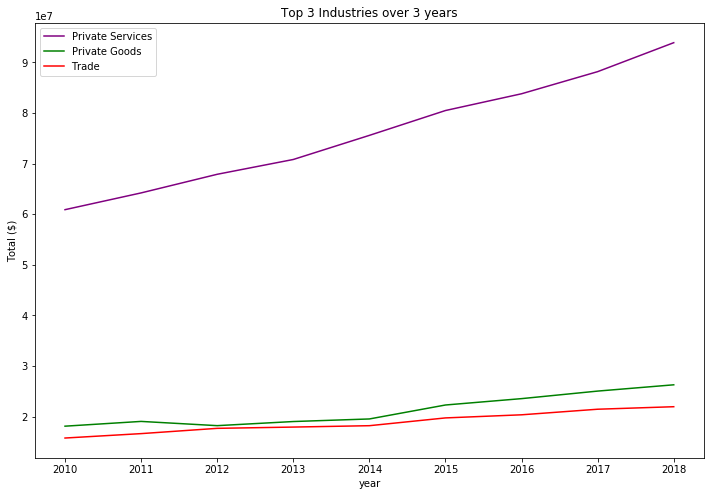

In [20]:
plt.figure(figsize=(12,8))
plt.plot(year,Priv_service, label='Private Services', c='purple')
plt.plot(year, Priv_goods, label='Private Goods', c='g')
plt.plot(year, Trade, label='Trade', c='r')
plt.title('Top 3 Industries over 3 years')
plt.xlabel('year')
plt.ylabel('Total ($)')
plt.legend()
plt.show()